Total count: 5572


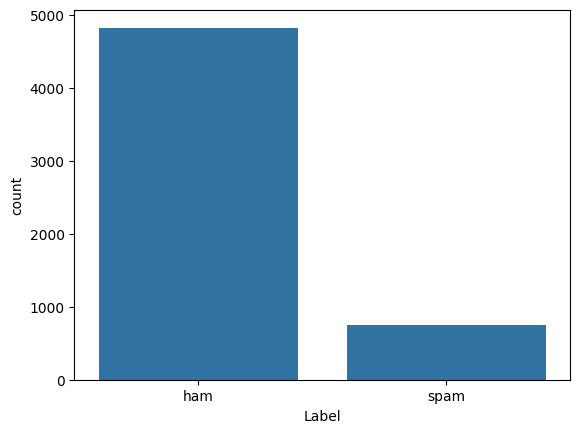

In [7]:
import pandas as pd
import seaborn as sns
import string
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

stop = text.ENGLISH_STOP_WORDS

#Load dataset
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data.iloc[:, :2]  # Select only the first two columns
data.columns = ['Label', 'Text']
_=sns.countplot(data=data,x='Label')

#print("Check for null: {}\n".format(data.isnull().values.any()))
print("Total count: {}".format(len(data.index)))
data.drop_duplicates(subset='Text')

#print("percentage of labels:\n",f"{100*data.groupby('Label').count()/len(data)}")

#Pre-processing
data['Label'] = data['Label'].map({'spam': 1, 'ham': 0})
data['Text'] = data['Text'].str.replace('[{}]'.format(string.punctuation), '', regex=True)
data['Text_without_stopwords'] = data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]).lower())

#Dataset stats
#display(data.head(10))
#_=sns.countplot(data=data,x='Label')
##print("percentage of labels:\n",f"{100*data.groupby('Label').count()/len(data)}")

#Vectorize and split data
trainData, testData = train_test_split(data, train_size=0.8, random_state=42)
vectorizer = TfidfVectorizer()
trainDocumentMatrix = vectorizer.fit_transform(trainData['Text_without_stopwords'])
testDocumentMatrix = vectorizer.transform(testData['Text_without_stopwords'])

In [11]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from timeit import default_timer as timer

#SVM model
mdlSVM = SVC(kernel='linear', probability=True)
startSVM = timer()
mdlSVM.fit(trainDocumentMatrix.toarray(), trainData['Label'])
predSVM_test = mdlSVM.predict(testDocumentMatrix.toarray())
endSVM = timer()

accuracySVM = accuracy_score(testData['Label'], predSVM_test)
precisionSVM = precision_score(testData['Label'], predSVM_test)
recallSVM = recall_score(testData['Label'], predSVM_test)
f1SVM = f1_score(testData['Label'], predSVM_test)
confMatSVM = confusion_matrix(testData['Label'], predSVM_test)
timeSVM = endSVM - startSVM

print('SVM Model Accuracy: {:.2f}'.format(accuracySVM))
print('SVM Model Precision: {:.2f}'.format(precisionSVM))
print('SVM Model Recall: {:.2f}'.format(recallSVM))
print('SVM Model F1-Score: {:.2f}'.format(f1SVM))
print('SVM Model training time: {:.3f} seconds'.format(timeSVM))
print('SVM Model Confusion Matrix:\n', confMatSVM, '\n')

#k-NN model
mdlKNN = KNeighborsClassifier(n_neighbors=157)
startKNN = timer()
mdlKNN.fit(trainDocumentMatrix.toarray(), trainData['Label'])
predKNN_test = mdlKNN.predict(testDocumentMatrix.toarray())
endKNN = timer()

accuracyKNN = accuracy_score(testData['Label'], predKNN_test)
precisionKNN = precision_score(testData['Label'], predKNN_test)
recallKNN = recall_score(testData['Label'], predKNN_test)
f1KNN = f1_score(testData['Label'], predKNN_test)
confMatKNN = confusion_matrix(testData['Label'], predKNN_test)
timeKNN = endKNN - startKNN

print('k-Nearest Neighbor Model Accuracy: {:.2f}'.format(accuracyKNN))
print('k-Nearest Neighbor Model Precision: {:.2f}'.format(precisionKNN))
print('k-Nearest Neighbor Model Recall: {:.2f}'.format(recallKNN))
print('k-Nearest Neighbor Model F1-Score: {:.2f}'.format(f1KNN))
print('k-Nearest Neighbor Model training time:{:.3f} seconds'.format(timeKNN))
print('k-Nearest Neighbor Confusion Matrix:\n', confMatKNN, '\n')

#Naive Bayes model
mdlNB = GaussianNB()
startNB = timer()
mdlNB.fit(trainDocumentMatrix.toarray(), trainData['Label'])
predNB_test = mdlNB.predict(testDocumentMatrix.toarray())
endNB = timer()

accuracyNB = accuracy_score(testData['Label'], predNB_test)
precisionNB = precision_score(testData['Label'], predNB_test)
recallNB = recall_score(testData['Label'], predNB_test)
f1NB = f1_score(testData['Label'], predNB_test)
confMatNB = confusion_matrix(testData['Label'], predNB_test)
timeNB = endNB - startNB

print('Naive Bayes Model Accuracy: {:.2f}'.format(accuracyNB))
print('Naive Bayes Model Precision: {:.2f}'.format(precisionNB))
print('Naive Bayes Recall: {:.2f}'.format(recallNB))
print('Naive Bayes F1-Score: {:.2f}'.format(f1NB))
print('Naive Bayes Model training time:{:.3f} seconds'.format(timeNB))
print('Naive Bayes Confusion Matrix:\n', confMatNB)


SVM Model Accuracy: 0.98
SVM Model Precision: 0.99
SVM Model Recall: 0.88
SVM Model F1-Score: 0.93
SVM Model training time: 100.5416174000
SVM Model Confusion Matrix:
 [[963   2]
 [ 18 132]] 

k-Nearest Neighbor Model Accuracy: 0.93
k-Nearest Neighbor Model Precision: 0.97
k-Nearest Neighbor Model Recall: 0.49
k-Nearest Neighbor Model F1-Score: 0.65
k-Nearest Neighbor Model training time:0.5300950000
k-Nearest Neighbor Confusion Matrix:
 [[963   2]
 [ 77  73]] 

Naive Bayes Model Accuracy: 0.88
Naive Bayes Model Precision: 0.54
Naive Bayes Recall: 0.89
Naive Bayes F1-Score: 0.67
Naive Bayes Model training time:0.7871095000
Naive Bayes Confusion Matrix:
 [[853 112]
 [ 17 133]]


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, BaggingClassifier, AdaBoostClassifier

stackedFeatures_test = [
    ('SVM', SVC(kernel='linear', probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors=157)),
    ('NB', GaussianNB())
]

stackingModel = StackingClassifier(estimators=stackedFeatures_test, final_estimator=LogisticRegression())
stackingStart = timer()
stackingModel.fit(trainDocumentMatrix.toarray(), trainData['Label'])
stacking_test = stackingModel.predict(testDocumentMatrix.toarray())
stackingEnd = timer()

accuracyStack = accuracy_score(testData['Label'], stacking_test)
precisionStack = precision_score(testData['Label'], stacking_test)
recallStack = recall_score(testData['Label'], stacking_test)
f1Stack = f1_score(testData['Label'], stacking_test)
confMatStack = confusion_matrix(testData['Label'], stacking_test)
timeStack = stackingEnd - stackingStart

print('Stacking Ensemble Model Accuracy: {:.2f}'.format(accuracyStack))
print('Stacking Ensemble Precision: {:.2f}'.format(precisionStack))
print('Stacking Ensemble Recall: {:.2f}'.format(recallStack))
print('Stacking Ensemble F1-Score: {:.2f}'.format(f1Stack))
print('Stacking Ensemble Model training time:{:.3f} seconds'.format(timeStack))
print('Stacking Ensemble Confusion Matrix:\n', confMatStack)

Stacking Ensemble Model Accuracy: 0.98
Stacking Ensemble Precision: 0.96
Stacking Ensemble Recall: 0.93
Stacking Ensemble F1-Score: 0.94
Stacking Ensemble Model training time:-479.6838967000
Stacking Ensemble Confusion Matrix:
 [[959   6]
 [ 11 139]]
